<a href="https://colab.research.google.com/github/rohithub55/airbnb-analysis/blob/main/AIRBNB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
#This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

#1.What can we learn about different hosts and areas?
#2.What can we learn from predictions? (ex: locations, prices, reviews, etc)
#3.Which hosts are the busiest and why?
#4.is there any noticeable difference of traffic among different areas and what could be the reason for it?

**Import Libraries**


In [ ]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px

**Mount the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded=files.upload()

**Load The Data**

In [ ]:
#creating directory path
dir_path='/content/drive/My Drive/Dataset'

In [ ]:
#read dataset and naming it as airbnb data frame
airbnb_df=pd.read_csv("/content/drive/MyDrive/Airbnb/Copy of Airbnb NYC 2019.csv")

**Data Profiling and Cleansing**

Let’s get a summary of the dataset we have.

In [ ]:
#check the index in columns
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#check the head
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#check the information about data and data type
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#we can fill these missing values in both with unknown & no_name respectively!

airbnb_df['name'].fillna('unknown',inplace=True)
airbnb_df['host_name'].fillna('no_name',inplace=True)

In [ ]:
airbnb_df.reviews_per_month.fillna(0, inplace=True)

In [ ]:
airbnb_df[['host_name','name','reviews_per_month']].isnull().values.any() #looks the null values are removed!

False

In [ ]:
airbnb_df= airbnb_df.drop(['last_review'],axis=1)

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [ ]:
#Checking for duplicate data

duplicate_data = airbnb_df.duplicated()
print(duplicate_data.sum())
airbnb_df[duplicate_data]


0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


#looks like there's no duplicate data present!

In [ ]:
#lets describe the price
airbnb_df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

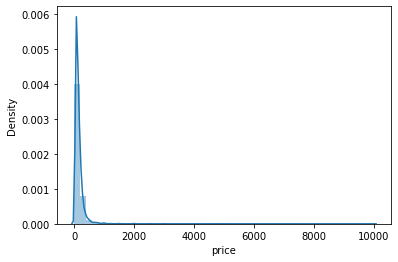

In [ ]:
#histogram
sns.distplot(airbnb_df['price']);

#The distribution tells it has positive skew
#also the distribution doesn't deviate much from normal distribution.

#**Exploration Data and Visualizing**

Explore our data and visualize it to recognize the relationship between the dataset.

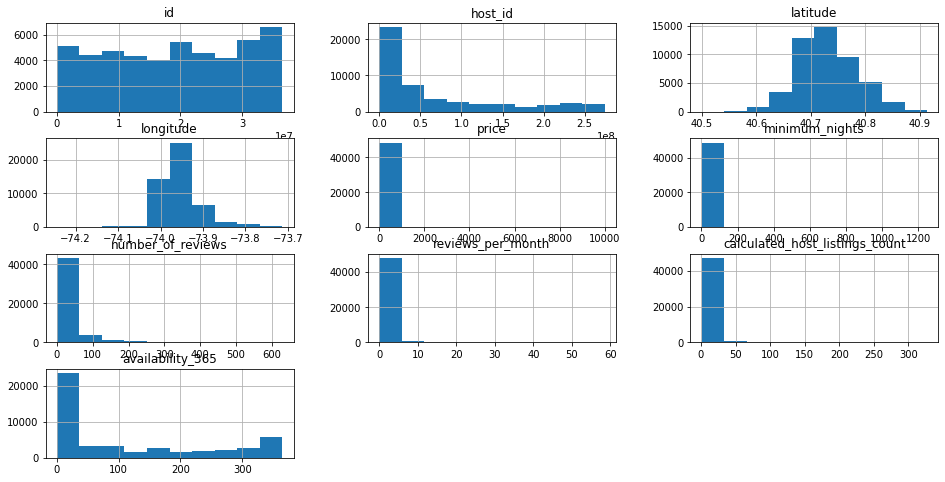

In [ ]:
airbnb_df.hist(figsize=(16,8))
plt.show()

In [ ]:
#avg price for different type of room type
avg_price=airbnb_df.groupby('room_type')['price'].median().reset_index()

In [ ]:
avg_price['price']=avg_price['price'].apply(lambda x:"{0:1.0f}$".format(x))

In [ ]:
avg_price

,room_type,price
0,Entire home/apt,160$
1,Private room,70$
2,Shared room,45$


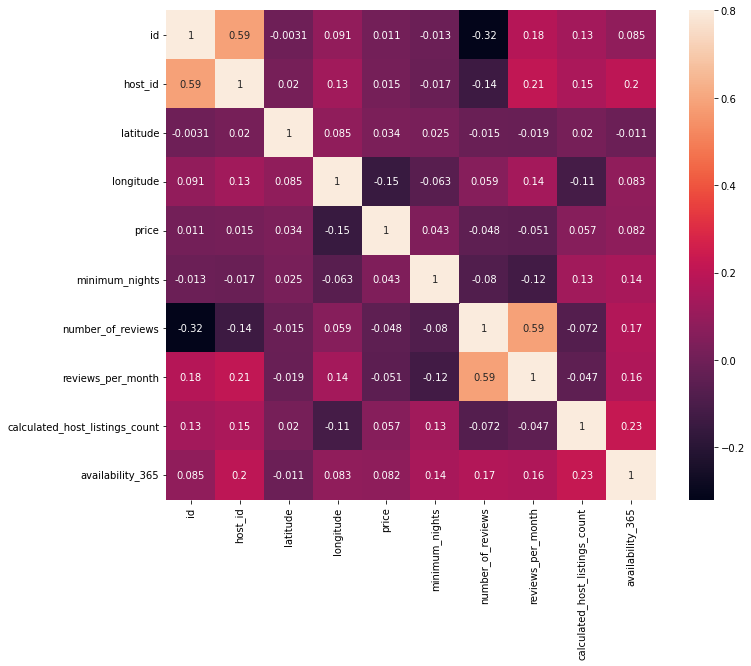

In [ ]:
#correlation matrix
corrmat = airbnb_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

According to our crystal ball, these are the variables most correlated with 'SalePrice'.where 'sale price' is dependend variable which depends on various factors like room type,avaibility of room ,number of reviews,reviews per month.

Based on our price heat map observation, we need to visualize the price distribution using a box plot to understand more on the listing price range grouped by the ‘neighbourhood_group’ /region area.

There’s correlation among host_id to reveiws_per_month & availability_365 (sequential color bar is used between value and color). Also there’s noticiable correlation between min_nights, no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.
no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

In [ ]:
#Find the busiest host
#We will find out the top 10 listings based on their number of reviews to know the most popular Airbnb listings 
airbnb_df.nlargest(10, 'number_of_reviews')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Carol,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Asa,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


#As we can see Dona is busiest host as number of reviews are highest for Dona's property.

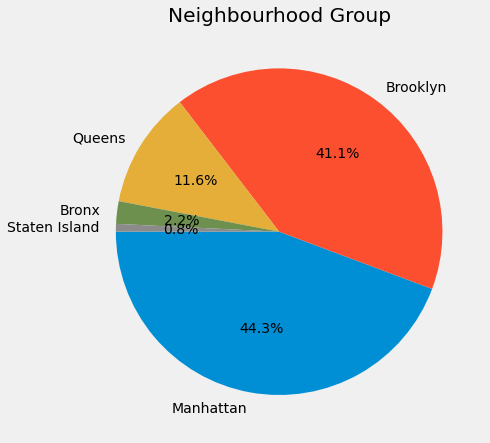

In [ ]:
#Finding the highest share of hotels.
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(airbnb_df.neighbourhood_group.value_counts(), labels=airbnb_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

#The above pie chart shows that the Airbnb Listings in Manhattan, Brooklyn and Queens has the highest share of hotels in NYC.

#So, let's see what can we learn from predictions like from Prices, location, reviews and many more.

In [ ]:
#finding which room type have highest price
px.bar(data_frame=avg_price,x='room_type',y='price',color='room_type',title='Avg price for each type of room(Room type vs Price)')

# As we can see from the above bar plot drawn by the plotly, there are three different distinct category of room available on the Airbnb platform with different renting price. So the average price for the rent of entire home/appt ,private room,shared room are 160 ,70  , 45$ respectively.

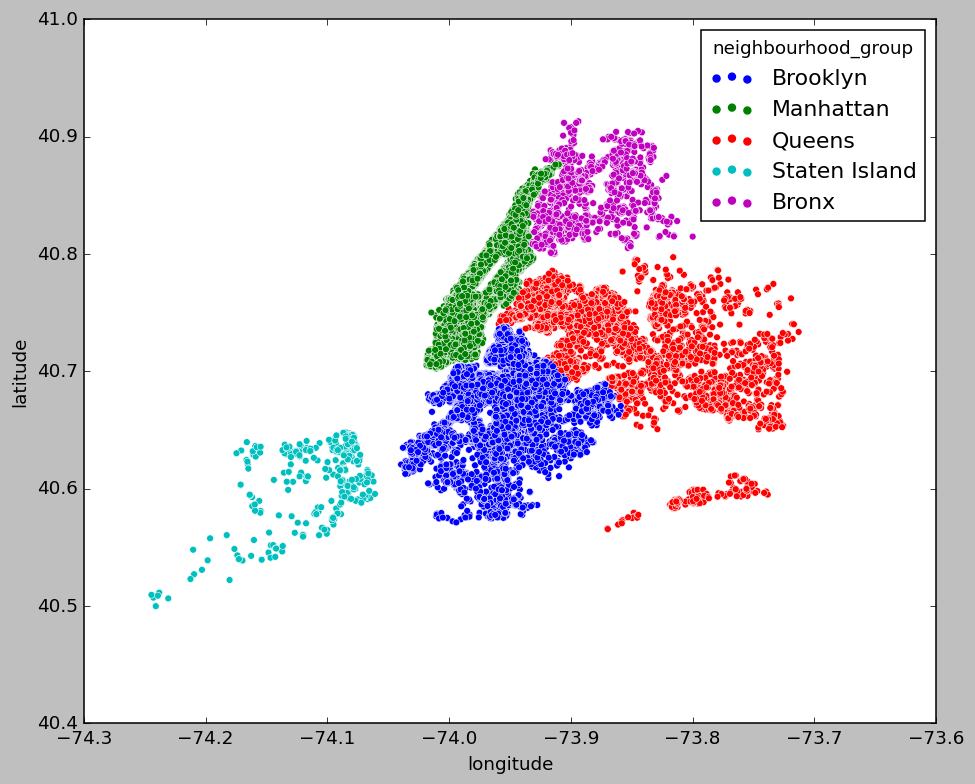

In [ ]:
#lets visualize distribution of various neighbourhood group across NYC
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8), dpi = 110)
sns.scatterplot(airbnb_df.longitude,airbnb_df.latitude,hue=airbnb_df.neighbourhood_group
)
plt.ioff()

# The above graph clearly shows that Queens holds the maximum number of neighbourhood groups.

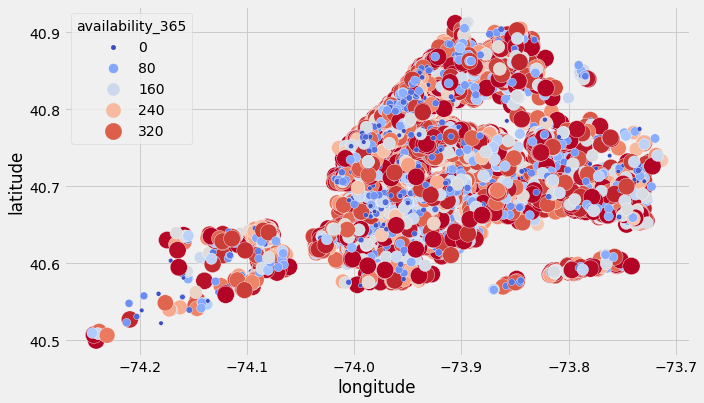

In [ ]:
#Below scatter plot shows availability of room in particular location.
f, ax = plt.subplots(figsize=(10, 6))
ax=sns.scatterplot(data=airbnb_df,x='longitude', y='latitude',hue="availability_365",palette='coolwarm',size='availability_365',
    sizes=(20,300))

# Above scaterplot help us to find the number of avaibility of rooms through-out the year in different locations of NYC.

# Now, let's find out Which neighbourhood has the highest listing?

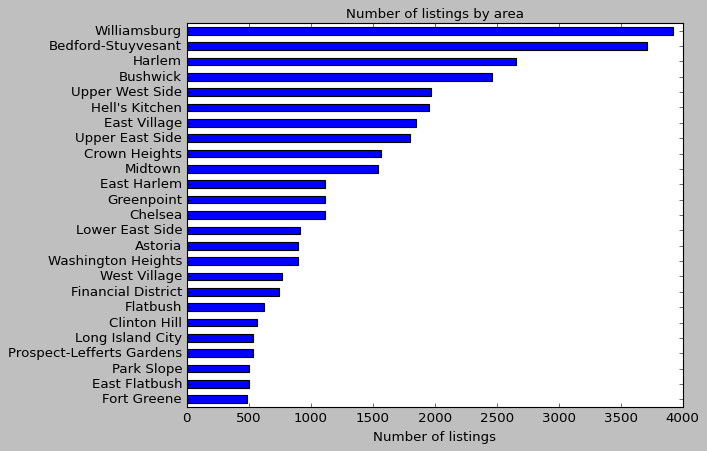

In [ ]:
#Seeing which neighborhood has the highest number of listings
feq = airbnb_df['neighbourhood'].value_counts().sort_values(ascending=True)
feq = feq[-25:]
feq.plot.barh(figsize=(8,6), color ='b', width= 0.5)
plt.title('Number of listings by area', fontsize=12)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

# As we study the above bar graph we can see the number of hostings in different areas.

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

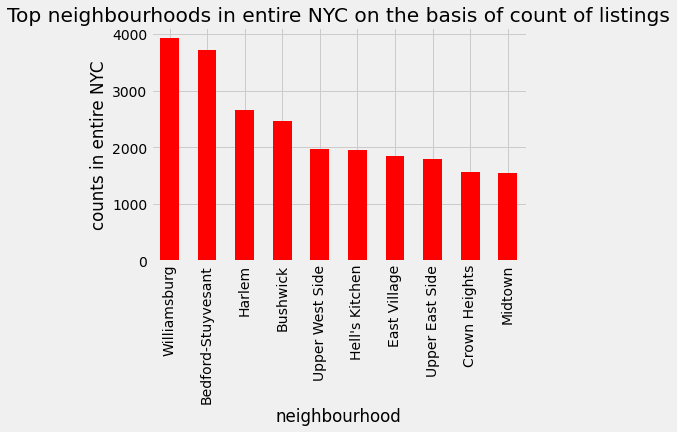

In [ ]:
#find top 10 neighbours in entire NYC on the basis of count of listings
top_10_neigbours= airbnb_df['neighbourhood'].value_counts()[:10] #checking top 10 neighbourhoods on the basis of no of listings in entire NYC!
top_10_neigbours.plot(kind='bar',color='r')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

# Above graph tell's us the top neighbourhoods in entire NYC on the basis of count of listings.

# Let's see, Is there any noticeable difference of traffic among different areas and what could be the reason for it?

# Now, Let's check the expensive & cheapest listings with respect to prices leading in entire NYC!

In [ ]:
#Top 5 expensive listings
airbnb_df.nlargest(5,'price')[['name','host_name','neighbourhood_group','neighbourhood','room_type']]


,name,host_name,neighbourhood_group,neighbourhood,room_type
9151,Furnished room in Astoria apartment,Kathrine,Queens,Astoria,Private room
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Erin,Brooklyn,Greenpoint,Entire home/apt
29238,1-BR Lincoln Center,Jelena,Manhattan,Upper West Side,Entire home/apt
6530,Spanish Harlem Apt,Olson,Manhattan,East Harlem,Entire home/apt
12342,"Quiet, Clean, Lit @ LES & Chinatown",Amy,Manhattan,Lower East Side,Private room


# Above table shows the top 5 most expensive properties across NYC.

In [ ]:
costliest_df= airbnb_df.loc[airbnb_df.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]


In [ ]:
costliest_df.sort_values(by='price',ascending=False)


,name,neighbourhood_group,host_name,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Erin,10000
29238,1-BR Lincoln Center,Manhattan,Jelena,10000
9151,Furnished room in Astoria apartment,Queens,Kathrine,10000
22353,Victorian Film location,Staten Island,Alissa,5000
24477,"""The luxury of Comfort""",Bronx,Kathy,2500


# Above table shows the top 5 most expensive properties across NYC in each neighbourhood group.

In [ ]:
#Top Cheapest value of listings
airbnb_df.sort_values(by='price',ascending=True)[['name','host_name','neighbourhood_group','neighbourhood','room_type']][:5]


,name,host_name,neighbourhood_group,neighbourhood,room_type
25796,Cozy yet spacious private brownstone bedroom,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Martial Loft,Brooklyn,Bushwick,Private room
25433,★Hostel Style Room | Ideal Traveling Buddies★,Anisha,Bronx,East Morrisania,Private room
25753,"Sunny, Quiet Room in Greenpoint",Lauren,Brooklyn,Greenpoint,Private room
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Kimberly,Brooklyn,Bedford-Stuyvesant,Private room


# Above tables shows the top 5 chepeast Properties.

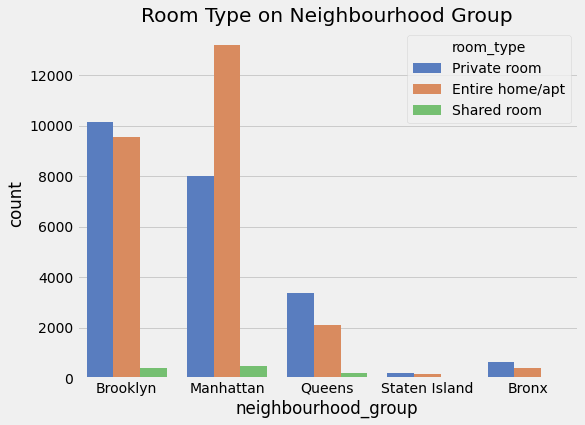

In [ ]:
#Room type and most listed neighbourhood group
plt.figure(figsize=(8,6))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb_df.neighbourhood_group,hue=airbnb_df.room_type,palette='muted')
plt.show()

# The graph shows that the most of the customers in Manhattan rent a Entire home/Apt and the customers in Staten Island holds the very minimum number of home/Apt.
# As we see most of the customers in Brooklyn prefers to take a Private room.
# It shows that shared room is prefered by very few customers than Entire home/Apt and Private room.

# Here in the below table we can find the list of most reviewed properties in NYC.

In [ ]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= airbnb_df.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group']]


,name,reviews_per_month,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Manhattan
38870,Lou's Palace-So much for so little,20.94,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens
36238,“For Heaven Cakes”,15.78,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens


#The box plot below shows the relationship between the availability room and neighborhood group.

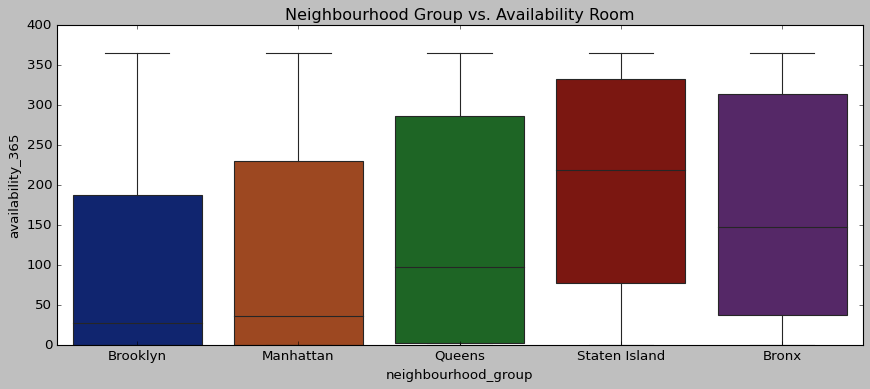

In [ ]:
#Neighbourhood group and their availability room 
plt.style.use('classic')
plt.figure(figsize=(13,5))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

## Below graph helps us to find the minimum stays of people in different types of room. Here we can clearly find the avarage stay of the people. Majority of people prefers to stay in Entire home/apt for an avg of 8-9 days followed by shared room for 6-7 days and private room for 5-6 days.

Text(0, 0.5, 'room type')

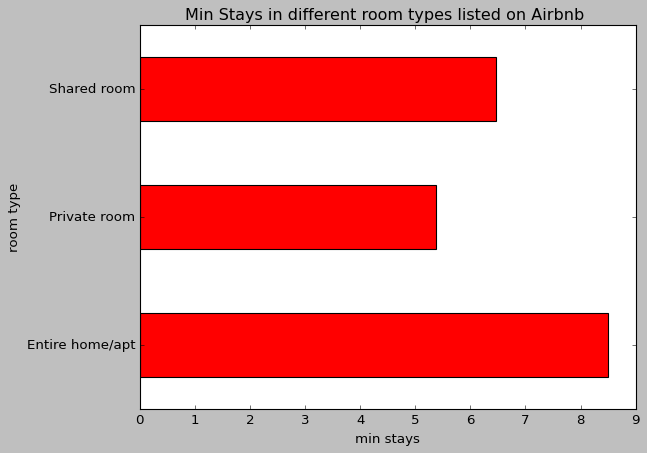

In [ ]:
#The minimum stays of people in different types of room
airbnb_df.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='r')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('min stays')
plt.ylabel('room type')
# ax = sns.swarmplot(x="room_type", y="minimum_nights", data=df_air)

#Top neighbourhoods in NYC with respect to average price/day of Airbnb listings:

In [ ]:
#Top neighbourhoods in NYC with respect to average price/day of Airbnb listings:
df_ngrp= airbnb_df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
121,Manhattan,Tribeca,490.638418
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
163,Queens,Neponsit,274.666667


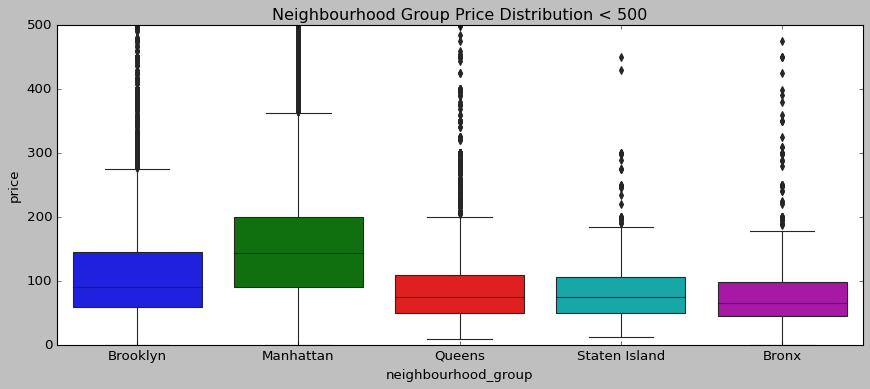

In [ ]:
#highest range price for the listings 
plt.style.use('classic')
plt.figure(figsize=(13,5))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = airbnb_df[airbnb_df.price<500])
plt.show()



#From above boxplot We can state that 
#Manhattan has the highest range price for the listings , followed by Brooklyn. Queens and Staten Island seem to have a very similar distribution, The Bronx is the cheapest.

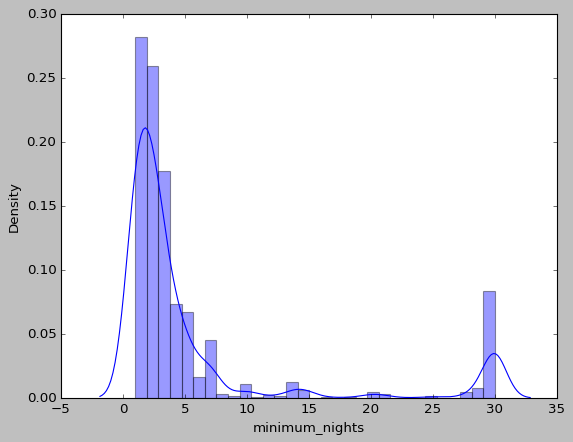

In [ ]:
#Minimum night stays reuired for booking
sns.distplot(airbnb_df[(airbnb_df['minimum_nights'] <= 30) & (airbnb_df['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.show()


#Seems that most hosts give less than 10 days for the minimum nights for booking a room, and 1 month is a popular one as well.

Text(0.5, 1.0, 'Rooms that are most favourable for customer')

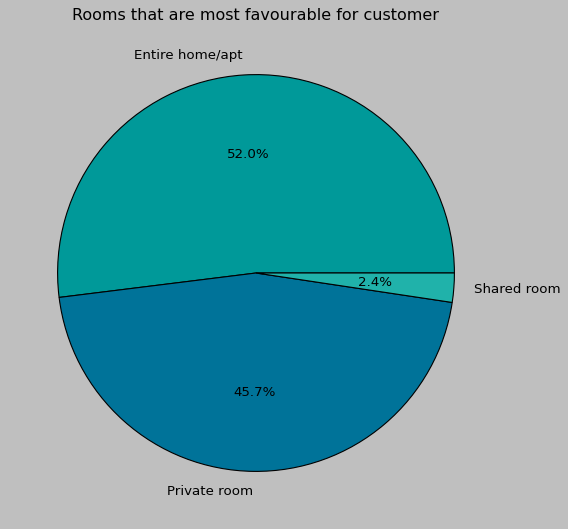

In [ ]:
#The rooms that customers choose the most

labels = airbnb_df['room_type'].value_counts().index
sizes = airbnb_df['room_type'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#009999','#007399','#20B2AA'] )
plt.title("Rooms that are most favourable for customer")

#Above figure shows the rooms that are most favourable for customers and the data that we can see is 52% of customers prefer Entire home/apt this volume is more than the total volume of rest of the room types.
#45.7% customers prefer to book a private room for themself.
#And the last room type is shared room which hold 2.4% of total volume.

In [ ]:
#host with most listings
host_with_most_listings= airbnb_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216
2901,Corporate Housing,Manhattan,8281
7480,Kazuya,Queens,8137
7546,Ken,Manhattan,7500
11399,Pranjal,Manhattan,4225
9856,Mike,Manhattan,2824


#Above table help us to find the host with his total number of properties listed on Airbnb and the results are shocking like Host Sonder holds 106929 properties alone in NYC followed by 9 other hosts.

#**Conclusion**

#That's it! We reached the end of our exercise.

#Throughout this kernel we put in practice many of the strategies which are useful for analyze the data. We philosophied about the variables, we analysed Price and average price. we correlated variables,vizualize the data with various graph. We dealt with missing data and we tested some of the fundamental statistical assumptions .